In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#import shapely as sp
#import timezonefinder as tf
#from wordcloud import WordCloud, STOPWORDS

In [2]:
with open('scrubbed.csv') as datafile:
    ufo = pd.read_csv(datafile)
    
ufo.head()

C:\Users\Leahtan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
#Add timezones
#for x in ufo:
#    tf.timezone_at(lng=ufo['longitude'], lat=ufo['latitude'])
    
#Determine gmt
#for x in ufo:
#    ufo['utc_dt'] = tf.astimezone(utc)

In [4]:
#Separate comments column to text file for wordcloud
ufo['comments'] = ufo['comments'] + ' ' 
comment_txt = ufo['comments'].astype(str).sum()
comment_txt[0:2000]


'This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit 1949 Lackland AFB&#44 TX.  Lights racing across the sky &amp; making 90 degree turns on a dime. Green/Orange circular disc over Chester&#44 England My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi penarth uk  circle  3mins  stayed 30ft above me for 3 mins slowly moved of and then with the blink of the eye the speed was unreal A bright orange color changing to reddish color disk/saucer was observed hovering above power transmission lines. Strobe Lighted disk shape object obse

In [5]:
#stopwords = set(STOPWORDS)
#wc = WordCloud(max_words=1000, stopwords=stopwords, margin=10,
#               random_state=1).generate(comments_txt)

In [10]:
ufo['duration (seconds)'] = ufo['duration (seconds)'].astype(str).map(lambda x: re.sub(r'\W+', '', x))
ufo['duration (seconds)'] = ufo['duration (seconds)'].astype(float)

SyntaxError: invalid syntax (<ipython-input-10-cf2d3db977ea>, line 2)

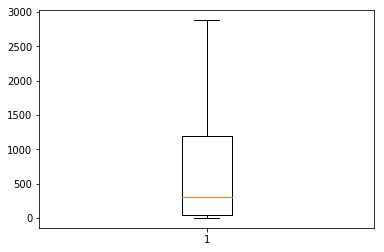

In [39]:
plt.boxplot(ufo['duration (seconds)'], showfliers = False) #Set showfliers to false or else you will be engulfed by the maddness
plt.show()

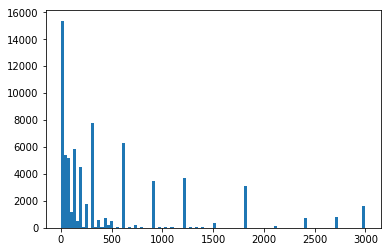

In [42]:
plt.hist(ufo['duration (seconds)'], range = [0,3000], bins = 100)
plt.show()

#worth categorizing into short, medium, long, and extra-long encounters
#looks like the majority are short encounters